# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


In [0]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [0]:
#load dataset as a list of ints
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [0]:
len(x_train), len(y_train), len(x_test), len(y_test)

(25000, 25000, 25000, 25000)

In [0]:
import numpy
X = numpy.concatenate((x_train, x_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [0]:

# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000, 300)
(50000,)


In [0]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [0]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
9999


Review length: 
Mean 300.00 words (0.000000)


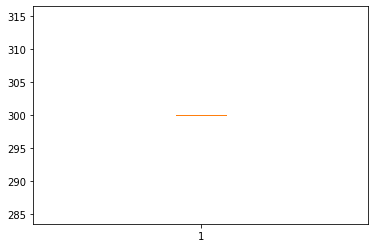

In [0]:
# Summarize review length
from matplotlib import pyplot
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

The embedding layer can be used at the start of a larger deep learning model.
Also we could load pre-train word embeddings into the embedding layer when we create our model.
Use the embedding layer to train our own word2vec models.
The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.

In [0]:

# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:

Embedding(5000, 32, input_length=500)

In [0]:
# create the model
top_words=10000
max_words=maxlen
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2400250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,720,501
Trainable params: 2,720,501
Non-trainable params: 0
_________________________________________________________________



Train on 25000 samples, validate on 25000 samples
Epoch 1/2





 - 18s - loss: 0.4424 - acc: 0.7692 - val_loss: 0.2953 - val_acc: 0.8739
Epoch 2/2
 - 16s - loss: 0.1310 - acc: 0.9545 - val_loss: 0.3430 - val_acc: 0.8644
Accuracy: 86.44%


Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [0]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.44%


In [0]:
# Final evaluation of the model
review = x_test[1:]
prediction = model.predict(review)
print(review)
print("Prediction (0 = negative, 1 = positive) = ", end="")
print("%0.4f" % prediction[0][0])

NameError: ignored